## **NLP SUBMISSION DICODING**
##### Nama    : Maulana Agus Setiawan
##### Dataset : https://www.kaggle.com/datasets/gregorut/videogamesales

<li>Import Library</li>

In [218]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

<li>Read Data</li>

In [219]:
df = pd.read_csv('vgsales.csv')
df = df[['Name', 'Genre']]
df

,Name,Genre
0,Wii Sports,Sports
1,Super Mario Bros.,Platform
2,Mario Kart Wii,Racing
3,Wii Sports Resort,Sports
4,Pokemon Red/Pokemon Blue,Role-Playing
...,...,...
16593,Woody Woodpecker in Crazy Castle 5,Platform
16594,Men in Black II: Alien Escape,Shooter
16595,SCORE International Baja 1000: The Official Game,Racing
16596,Know How 2,Puzzle


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    16598 non-null  object
 1   Genre   16598 non-null  object
dtypes: object(2)
memory usage: 259.5+ KB


In [221]:
df.head()

,Name,Genre
0,Wii Sports,Sports
1,Super Mario Bros.,Platform
2,Mario Kart Wii,Racing
3,Wii Sports Resort,Sports
4,Pokemon Red/Pokemon Blue,Role-Playing


<li>Encoding</li>

In [222]:
category = pd.get_dummies(df.Genre)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Genre')
new_df

,Name,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Wii Sports,False,False,False,False,False,False,False,False,False,False,True,False
1,Super Mario Bros.,False,False,False,False,True,False,False,False,False,False,False,False
2,Mario Kart Wii,False,False,False,False,False,False,True,False,False,False,False,False
3,Wii Sports Resort,False,False,False,False,False,False,False,False,False,False,True,False
4,Pokemon Red/Pokemon Blue,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,False,False,False,False,True,False,False,False,False,False,False,False
16594,Men in Black II: Alien Escape,False,False,False,False,False,False,False,False,True,False,False,False
16595,SCORE International Baja 1000: The Official Game,False,False,False,False,False,False,True,False,False,False,False,False
16596,Know How 2,False,False,False,False,False,True,False,False,False,False,False,False


<li>Cek Nilai Null</li>

In [223]:
new_df.isna().sum()

Name            0
Action          0
Adventure       0
Fighting        0
Misc            0
Platform        0
Puzzle          0
Racing          0
Role-Playing    0
Shooter         0
Simulation      0
Sports          0
Strategy        0
dtype: int64

<li>Split Data</li>

In [224]:
X = new_df['Name'].values
y = new_df[[
    'Action', 'Adventure', 'Fighting', 'Misc', 
    'Platform', 'Puzzle', 'Racing', 'Role-Playing', 
    'Shooter', 'Simulation', 'Sports', 'Strategy'
]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<li>Tokenizing</li>

In [225]:
NW = 5000
oov_tok = '-'

tokenizer = Tokenizer(num_words=NW, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

Xtrain_Seq = tokenizer.texts_to_sequences(X_train)
Xtest_Seq  = tokenizer.texts_to_sequences(X_test)

X_padded_train = pad_sequences(Xtrain_Seq)
X_padded_test = pad_sequences(Xtest_Seq)

<li>Modelling</li>

In [232]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=NW, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

<li>Callbacks</li>

In [233]:
callbacks = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1,
)

<li>Proses Training</li>

In [234]:
epoch = 30
history = model.fit(
    X_padded_train,
    y_train,
    epochs=epoch,
    validation_data=(X_padded_test, y_test),
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/30
415/415 [==============================] - 11s 22ms/step - loss: 1.9628 - accuracy: 0.3514 - val_loss: 1.4530 - val_accuracy: 0.5307
Epoch 2/30
415/415 [==============================] - 6s 14ms/step - loss: 1.0894 - accuracy: 0.6704 - val_loss: 1.0244 - val_accuracy: 0.7018
Epoch 3/30
415/415 [==============================] - 5s 13ms/step - loss: 0.6989 - accuracy: 0.7940 - val_loss: 0.9223 - val_accuracy: 0.7328
Epoch 4/30
415/415 [==============================] - 5s 13ms/step - loss: 0.5184 - accuracy: 0.8432 - val_loss: 0.9153 - val_accuracy: 0.7389
Epoch 5/30
415/415 [==============================] - 5s 13ms/step - loss: 0.4173 - accuracy: 0.8732 - val_loss: 0.9181 - val_accuracy: 0.7518
Epoch 6/30
415/415 [==============================] - 5s 13ms/step - loss: 0.3529 - accuracy: 0.8860 - val_loss: 0.9534 - val_accuracy: 0.7494
Epoch 7/30
415/415 [==============================] - 5s 12ms/step - loss: 0.3034 - accuracy: 0.9020 - val_loss: 0.9765 - val_accuracy: 0.752

<li>Evaluasi Model</li>

In [ ]:
los, acc = model.evaluate(X_padded_test, y_test)

print("Loss : ", los)
print("Accuracy : ", acc)

104/104 [==============================] - 1s 7ms/step - loss: 1.3132 - accuracy: 0.7575
Loss :  1.3131922483444214
Accuracy :  0.7575300931930542


<li>Plotting</li>

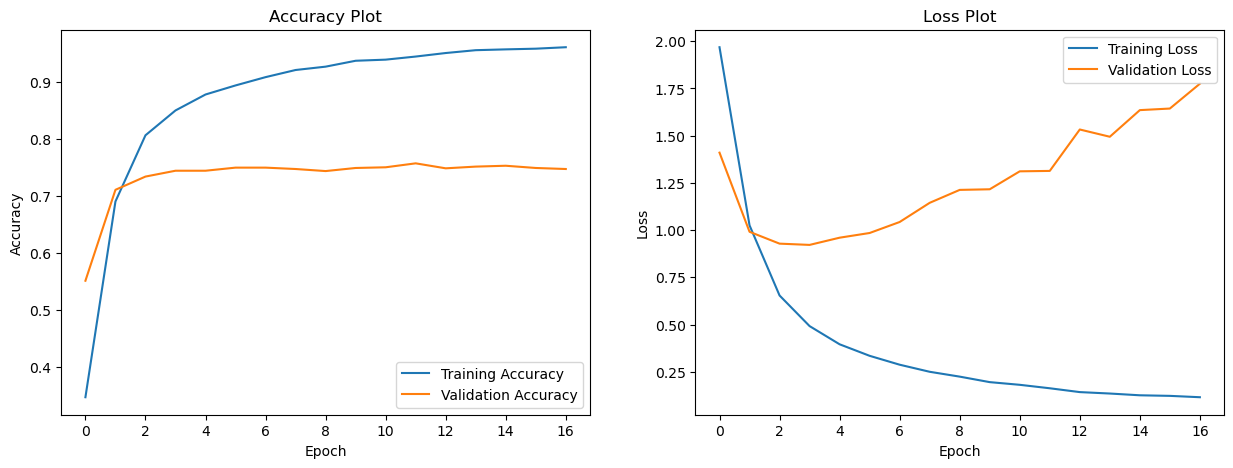

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()